# データローダーのテスト

自己教師あり学習用にデータローダーをいじくることにする．


In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets


In [4]:

class SelfSupervisedDataset(Dataset):
    def __init__(self, base_dataset, transform_1, transform_2):
        """
        Args:
            base_dataset (Dataset): 元となるデータセット（例: CIFAR-10）。
            transform_1 (callable): 1つ目のデータ拡張。
            transform_2 (callable): 2つ目のデータ拡張。
        """
        self.base_dataset = base_dataset
        self.transform_1 = transform_1
        self.transform_2 = transform_2

    def __len__(self):
        return len(self.base_dataset)

    def __getitem__(self, idx):
        img, label = self.base_dataset[idx]  # 元画像とラベルを取得

        # NumPy配列からPIL形式に変換
        #img = transforms.ToPILImage()(img)

        augmented_1 = self.transform_1(img)  # データ拡張1を適用
        augmented_2 = self.transform_2(img)  # データ拡張2を適用
        return augmented_1, augmented_2, label

# 1つ目のデータ拡張
transform_1 = transforms.Compose([
    transforms.RandomResizedCrop(size=32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

# 2つ目のデータ拡張
transform_2 = transforms.Compose([
    transforms.RandomResizedCrop(size=32),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
])

# CIFAR-10データセットのロード
base_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transforms.ToTensor())

# カスタムデータセットを作成
self_supervised_dataset = SelfSupervisedDataset(base_dataset, transform_1, transform_2)

# DataLoaderを作成
dataloader = DataLoader(self_supervised_dataset, batch_size=64, shuffle=True, num_workers=4)

# サンプルループ
#for batch in dataloader:
#    augmented_1, augmented_2, labels = batch
#    print(f"Augmented 1 shape: {augmented_1.shape}, Augmented 2 shape: {augmented_2.shape}")
#   break

#next(iter(dataloader)) # num_workers と，next(iter(dataloader)) の組み合わせはデッドロックを生じさせる可能性あり


Files already downloaded and verified


Files already downloaded and verified


Text(0.5, 1.0, 'Augmented 2')

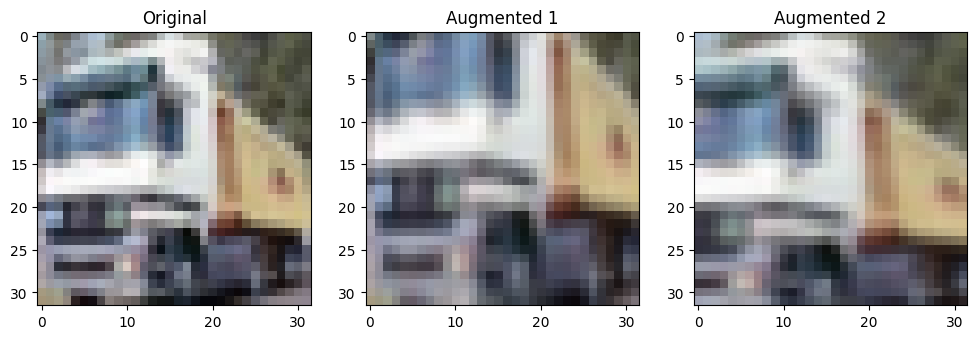

In [23]:
# CIFAR-10データセットのロード (ToTensor() を追加)
base_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=None)

image, label = base_dataset[1]

img1 = transform_1(image)
img2 = transform_2(image)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image)
axes[0].set_title("Original")
axes[1].imshow(img1.permute(1, 2, 0))
axes[1].set_title("Augmented 1")
axes[2].imshow(img2.permute(1, 2, 0))
axes[2].set_title("Augmented 2")



In [26]:
# CIFAR-10データセットのロード (ToTensor() を追加)
base_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=None)
# カスタムデータセットを作成
self_supervised_dataset = SelfSupervisedDataset(base_dataset, transform_1, transform_2)

img1, img2, label = self_supervised_dataset[1]

Files already downloaded and verified


In [33]:
# どうやら num_workers=0 にするとエラーが出ない．ここにデッドロックの可能性があるぽい

dataloader = DataLoader(self_supervised_dataset, batch_size=64, shuffle=True, num_workers=0)

for batch in dataloader:
    augmented_1, augmented_2, labels = batch
    print(f"Augmented 1 shape: {augmented_1.shape}, Augmented 2 shape: {augmented_2.shape}")
    break

Augmented 1 shape: torch.Size([64, 3, 32, 32]), Augmented 2 shape: torch.Size([64, 3, 32, 32])


Text(0.5, 1.0, 'Augmented 2')

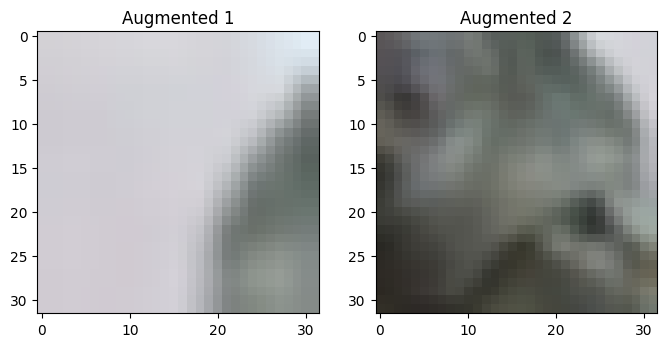

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(augmented_1[0].permute(1, 2, 0))
axes[0].set_title("Augmented 1")

axes[1].imshow(augmented_2[0].permute(1, 2, 0))
axes[1].set_title("Augmented 2")
